# Matplotlib & Seaborn Codealong

Before getting started we import the necessary libraries we will use.
- Pandas
- Numpy
- Matplotlib Pyplot
- Seaborn

In [1]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, as an aid, you can find cheatsheets for Matplotlib and Seaborn below:
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

We will do our first plots using Matplotlib. We will do only a single plot for now with several lines.
We use NumPy to create an array of numbers from 0 to 10, that will represent the X axis.

In [2]:
x = np.arange(0, 11) # range(10)

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

We will create arrays for the Y axis related to values of x:
- y = x*2
- y = x
- y = x/2
- y = x*3

In [4]:
y1 = x*2
y2 = x
y3 = x/2
y4 = x*3

Now we will create the plot. We will first create an easy plot and then we'll modify parametres.

Let's use first the subplot() approach

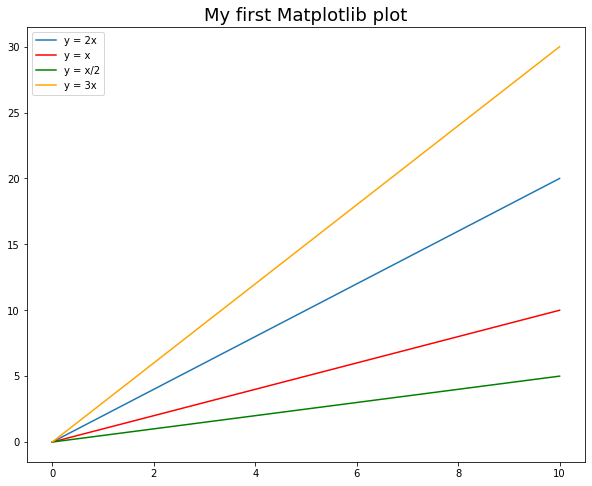

In [6]:
# create first figure and ax
plt.figure(figsize = (10,8)) # (12,10)

# we add a title to the figure or the ax
#ax.set_title('My first Matplotlib plot', fontsize=18)
plt.subplot(1,1,1)
plt.title('My first Matplotlib plot', fontsize=18)
# we plot the different lines adding them to the axis
plt.plot(x,y1, label='y = 2x')
plt.plot(x,y2, c='red', label='y = x')
plt.plot(x,y3, c='green', label='y = x/2')
plt.plot(x,y4, c='orange', label='y = 3x')

# we add the legend
plt.legend()

Now let's use the subplot**s**() approach

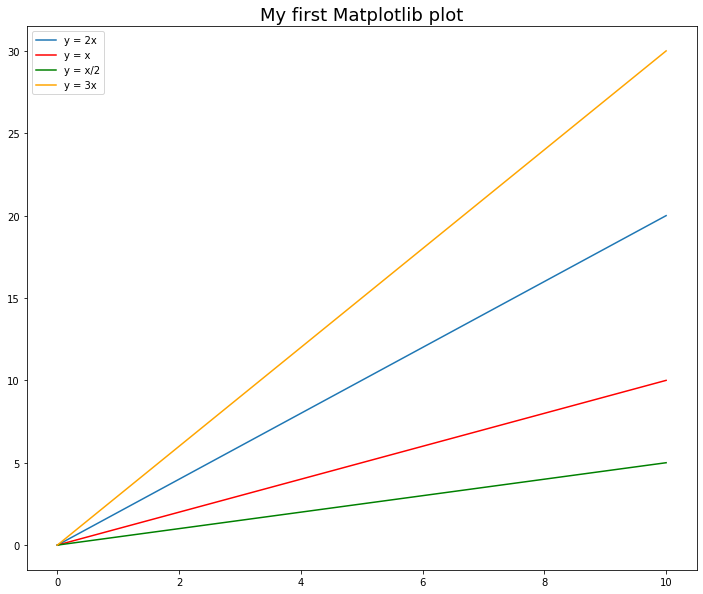

In [7]:
# create first figure and ax
fig, ax = plt.subplots(1,1,figsize = (12,10))

# we add a title to the figure or the ax
ax.set_title('My first Matplotlib plot', fontsize=18)
# we plot the different lines adding them to the axis
ax.plot(x,y1, label='y = 2x')
ax.plot(x,y2, c='red', label='y = x')
ax.plot(x,y3, c='green', label='y = x/2')
ax.plot(x,y4, c='orange', label='y = 3x')

# we add the legend
ax.legend()

We will do now a figure with 3 axes in a single row  (3 subplots). First we define two curves.
- y = x^2
- y = 2^x

In [8]:
y5 = x**2
y6 = 2**x

Now we will create the figure and all the axes, and will plot the lines:

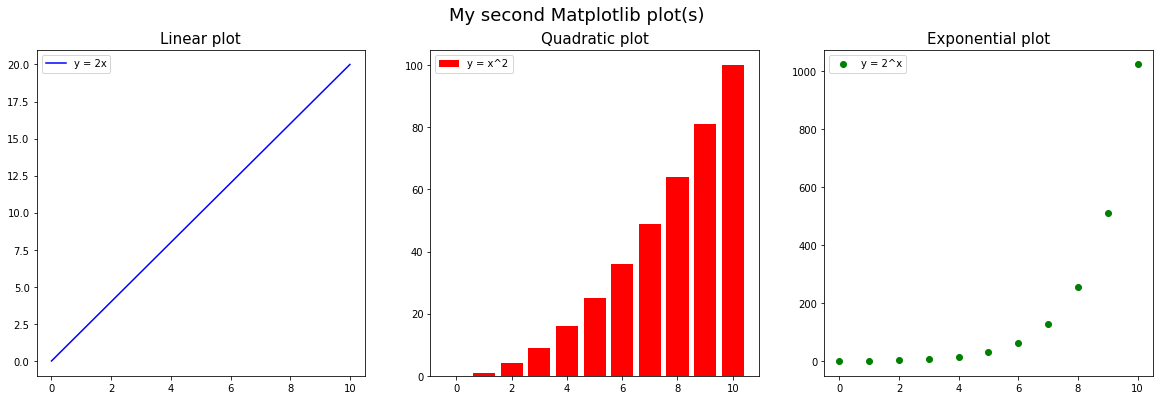

In [9]:
# create the figure and axes
fig2,axes2 = plt.subplots(1,3,figsize = (20,6)) # Here the figsize controls the full canvas size, not the individual figure size

# add an overall title for the figure
fig2.suptitle('My second Matplotlib plot(s)', fontsize=18)

# create first plot (left), adding a title
axes2[0].plot(x,y1, c='blue', label='y = 2x')
axes2[0].set_title('Linear plot', fontsize=15)

# create second plot (centre), adding a title
axes2[1].bar(x,y5, color='red', label='y = x^2')
axes2[1].set_title('Quadratic plot', fontsize=15)

# create third plot (right), adding a title
axes2[2].scatter(x,y6, c='green', label='y = 2^x')
axes2[2].set_title('Exponential plot', fontsize=15)

# set a legend
for ax in axes2:
    ax.legend(loc = 'upper left')

## Using Matplotlib and Seaborn with Dataframes

First we will import a dataset by executing the cells below

In [10]:
titanic = sns.load_dataset('titanic')

In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Count how many passengers survived and how many didn't. Use only one method. Store the result in a variable.

In [12]:
survival = titanic['alive'].value_counts()

In [13]:
survival

no     549
yes    342
Name: alive, dtype: int64

We will create now a bar chart. The procedure is the same as the first plot we created.

<BarContainer object of 2 artists>

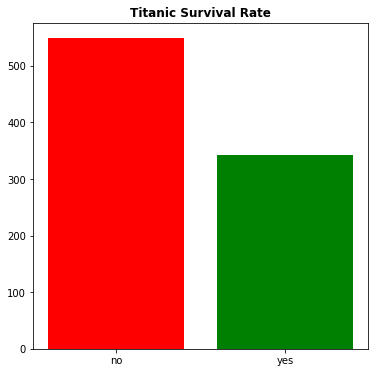

In [14]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (6,6))

# set title
ax3.set_title('Titanic Survival Rate', fontweight='bold')

# plot the bar chart
ax3.bar(survival.index, survival, color=('red','green'))

Now let's create a figure with two bar charts (axes), one above the other: 
- One chart displaying the number of men, women, and children.
- Another displaying the number of passengers by *class* (first, second and third class).

Alert: do not name a variable as *class* because this name is already being used by Python (like *list*, *dict*, etc.)

In [15]:
who = titanic['who'].value_counts()
who

man      537
woman    271
child     83
Name: who, dtype: int64

In [16]:
classes = titanic['class'].value_counts().sort_index()
classes

First     216
Second    184
Third     491
Name: class, dtype: int64

<BarContainer object of 3 artists>

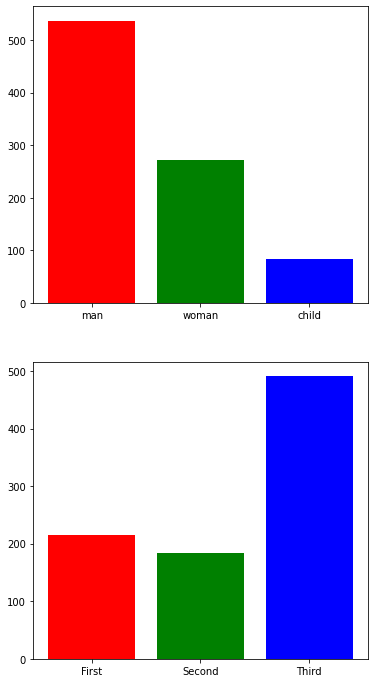

In [17]:
# create figure and axes
fig3, axes3 = plt.subplots(2,1,figsize = (6,12))

# plot the bar chart
axes3[0].bar(who.index, who, color=('red','green', 'blue'))
axes3[1].bar(classes.index, classes, color=('red','green', 'blue'))

### Seaborn (more complex graphs)

We want to know if the class of the passenger's ticket affected their chances of survival. We will introduce Seaborn now as it allow us to create more complex graphs relatively easy.

First, let's find and create a dataframe with the survival ratings by *class*.

In [18]:
class_survival = titanic.groupby(['class','alive'])['survived'].count().reset_index()
class_survival

,class,alive,survived
0,First,no,80
1,First,yes,136
2,Second,no,97
3,Second,yes,87
4,Third,no,372
5,Third,yes,119


We now will create the bar chart with Seaborn. First we set the color palette, which means that a preset palette of colors will be used in the upcoming graphs. You can find information of Seaborn palettes in the [Official Seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) or in [articles](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f).

In [19]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

And now we create the bar chart. In Seaborn we can use now the additional parameter 'hue' to create plots.

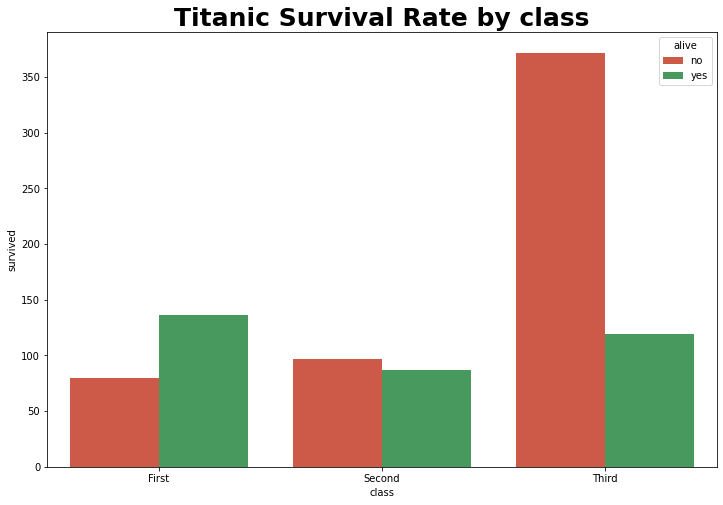

In [20]:
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.set_title('Titanic Survival Rate by class', size='25', fontweight='bold')

sns.barplot(x = class_survival['class'],y = class_survival['survived'], hue = class_survival['alive'], ax = ax4, palette=palette_alive)

Let's now create another figure with **two** axes in a row. The left ax will plot the same data as the one above, but *only with male passengers*, whereas the right ax will plot the *female passengers*.

In [21]:
gender_class = titanic.groupby(['sex', 'class', 'alive'])['alive'].count().rename('count').reset_index()
gender_class_males = gender_class[gender_class['sex']=='male']
gender_class_females = gender_class[gender_class['sex']=='female']

Text(0.5, 1.0, 'Male')

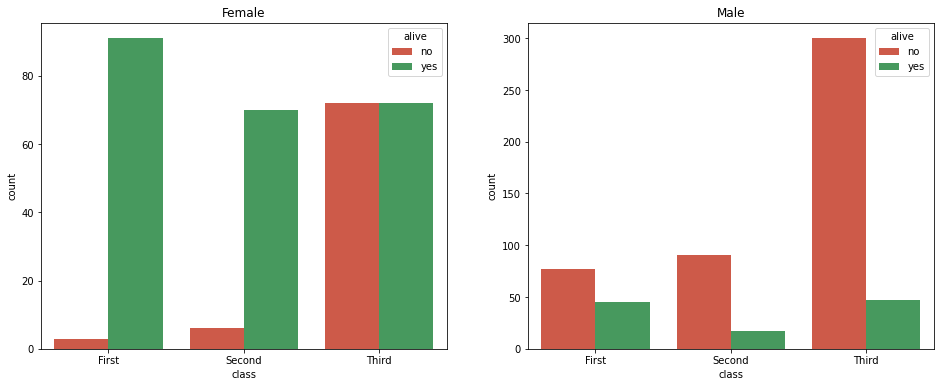

In [24]:
fig5, axes5 = plt.subplots(1,2,figsize=(16,6))

#sns.barplot(x=gender_class_males['class'], y=gender_class_males['count'], hue = 'alive',  ax = axes5[0], palette=palette_alive)
sns.barplot(x='class', y='count', hue = 'alive', data = gender_class_females, ax = axes5[0], palette=palette_alive)
axes5[0].set_title('Female')
sns.barplot(x='class', y='count', hue = 'alive', data = gender_class_males, ax = axes5[1], palette=palette_alive)
axes5[1].set_title('Male')

We will now ressemble the same two-axes figure with only one line (Seaborn allow us to do that) creating what it's called a *Facetgrid* object. A FacetGrid object can be defined as a complex figure in which each chart has been *filtered* according to some data column.

Facetgrids can be created using several seaborn functions, but we will use one called *catplot* (whose documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.catplot.html).

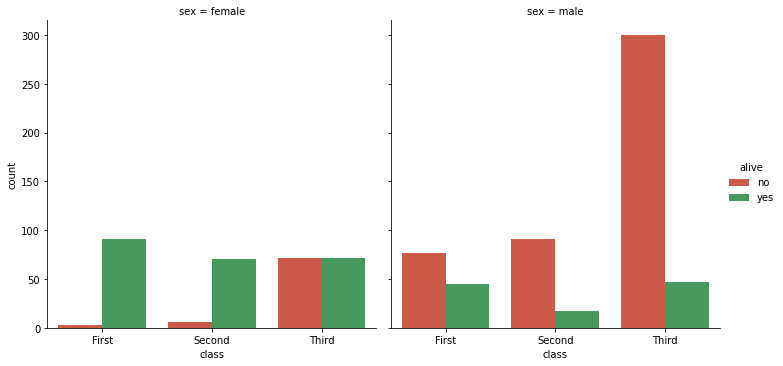

In [23]:
fg6 = sns.catplot(x='class', y = 'count', hue = 'alive', data = gender_class, col='sex', kind='bar',palette=palette_alive)

As a final challenge, we will create another FacetGrid with catplot but instead of bars we will plot **boxes** (a box plot is very useful if you want to see at a first glance the relevant statistics of a distribution). 

We want to plot the following:

- In each ax we will plot the distribution of *ages* according to their *sex* (two boxplots per subplot).
- Each FacetGrid column will define a filter according to the passengers' *class*. (The FacetGrid will then have three subplots).

*Hint*: You can use the *titanic* DataFrame without any further modification.

**Bonus track**: If you feel confortable you can also add a *row* conditition that will filter the plots according to the *alone* column (whether the passenger embarked with any relatives). In this case the FacetGrid will become a 2x3 matrix of subplots.

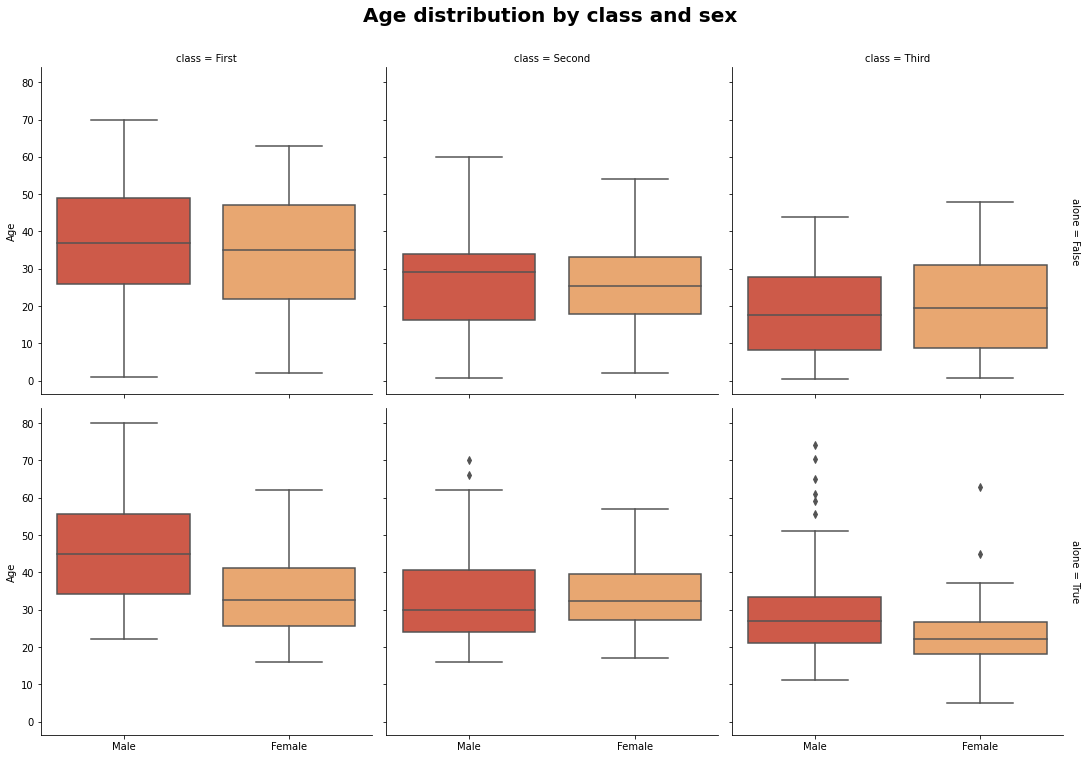

In [25]:
fg7 = sns.catplot(x='sex', y = 'age', data = titanic, col='class', row='alone', kind="box", margin_titles = True)
fg7.fig.suptitle('Age distribution by class and sex', size='20', fontweight='bold', y = 1.05)
fg7.set_xticklabels(['Male', 'Female'])
fg7.set_ylabels('Age')
fg7.set_xlabels('')